# Simple Supermarket Sales Prediction Notebook

This notebook loads the data, preprocesses it, trains an XGBoost model, and saves the trained model for deployment.

In [2]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
import joblib

In [3]:
# 2. Load data
df = pd.read_csv('../data/supermarket_sales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier 2,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [4]:
# 3. Preprocess data (simple version)
df = df.dropna()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category').cat.codes
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,156,9.30,1,0.016047,4,249.8,9,1999,1,0,1,3735.1380,11.5
1,8,5.92,2,0.019278,14,48.3,3,2009,1,0,2,443.4228,14.3
2,662,17.50,1,0.016760,10,141.6,9,1999,1,0,1,2097.2700,14.5
3,1121,19.20,2,0.000000,6,182.1,0,1998,1,0,0,732.3800,13.6
4,1297,8.93,1,0.000000,9,53.9,1,1987,0,1,1,994.7052,14.1


In [5]:
# 4. Set features and target
# Change 'sales' to your actual target column if different
target = 'Item_MRP'
features = [col for col in df.columns if col != target]
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(df.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')


In [6]:
# 5. Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [7]:
# 7. Save the trained model with features (IMPORTANT for Streamlit)
import joblib
print("Feature names used for training:", features)
print("Number of features:", len(features))

# Save both model and feature names together
model_data = {
    'model': xgb_model,
    'features': features,
    'target_name': target,
    'preprocessing_info': 'Categorical columns encoded as codes, missing values dropped'
}

joblib.dump(model_data, '../model/sales_predictor.joblib')
print('✅ Model and features saved successfully to ../model/sales_predictor.joblib')
print('Ready for Streamlit deployment!')

Feature names used for training: ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'Profit']
Number of features: 12
✅ Model and features saved successfully to ../model/sales_predictor.joblib
Ready for Streamlit deployment!


## 1. Load Data
*Notebook by Leslie Fernando*
Place your dataset (e.g., `supermarket_sales.csv`) in the `data/` folder.

In [5]:
# Load data
import os
data_path = '../data/supermarket_sales.csv'
if not os.path.exists(data_path):
    raise FileNotFoundError('Dataset not found! Please place supermarket_sales.csv in the data/ folder.')
df = pd.read_csv(data_path)  # Update filename if needed
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier 2,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


## 2. Data Preprocessing
- Handle missing values
- Encode categorical variables
- Feature engineering (e.g., extract date features)
- Check for outliers and data consistency
- Visualize distributions and correlations

## 3. Model Selection, Training, and Tuning
Try multiple models (Random Forest, XGBoost) and tune hyperparameters for best results.

## 4. Model Evaluation and Selection
Evaluate models using RMSE, MAE, and R². Select the best model for saving and deployment.

## 5. Save the Best Model and Deploy
Save the best performing model to the `model/` folder for use in the Streamlit app.

In [6]:
# Save the best model for deployment
import joblib
joblib.dump(best_model, '../model/sales_predictor.joblib')
print('Best model saved to ../model/sales_predictor.joblib')

NameError: name 'best_model' is not defined

In [7]:
# Evaluate both models and select the best one
def print_metrics(y_true, y_pred, model_name):
    print(f'{model_name} Results:')
    print('RMSE:', np.sqrt(mean_squared_error(y_true, y_pred)))
    print('MAE:', mean_absolute_error(y_true, y_pred))
    print('R2:', r2_score(y_true, y_pred))
    print('-'*30)
rf_pred = best_rf.predict(X_test)
xgb_pred = best_xgb.predict(X_test)
print_metrics(y_test, rf_pred, 'Random Forest (Tuned)')
print_metrics(y_test, xgb_pred, 'XGBoost (Tuned)')
# Choose the best model based on RMSE
best_model = best_rf if np.sqrt(mean_squared_error(y_test, rf_pred)) < np.sqrt(mean_squared_error(y_test, xgb_pred)) else best_xgb

NameError: name 'best_rf' is not defined

In [8]:
# Hyperparameter tuning example (XGBoost)
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=3, scoring='neg_root_mean_squared_error')
xgb_grid.fit(X_train, y_train)
print('Best XGB Params:', xgb_grid.best_params_)
best_xgb = xgb_grid.best_estimator_

NameError: name 'GridSearchCV' is not defined

In [9]:
# Hyperparameter tuning example (Random Forest)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print('Best RF Params:', grid_search.best_params_)
best_rf = grid_search.best_estimator_

NameError: name 'X_train' is not defined

### Outlier Detection and Correlation Analysis
Check for outliers and analyze feature correlations to improve model performance.

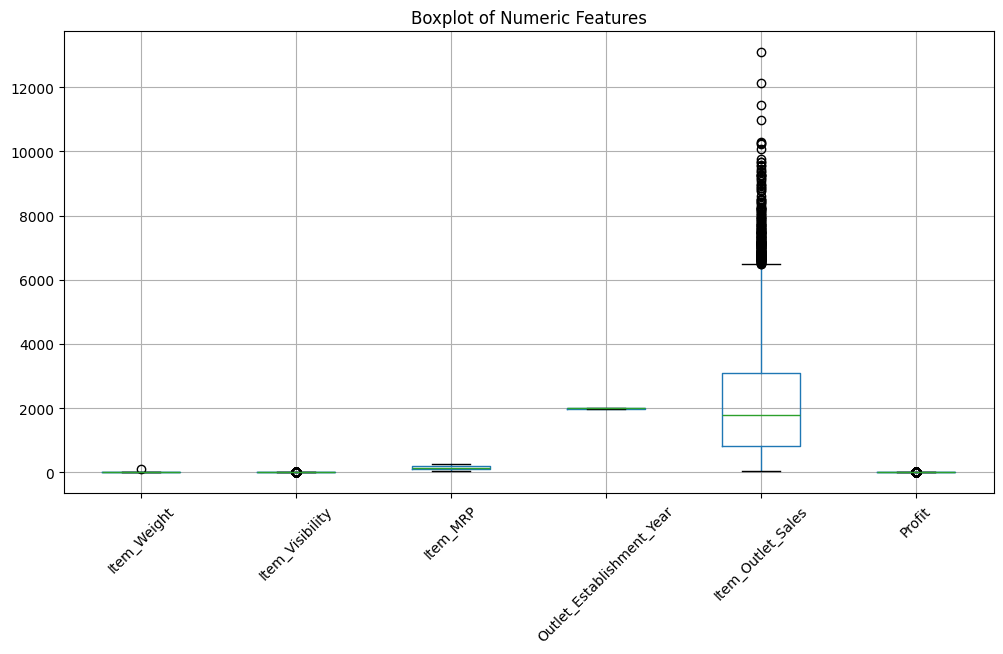

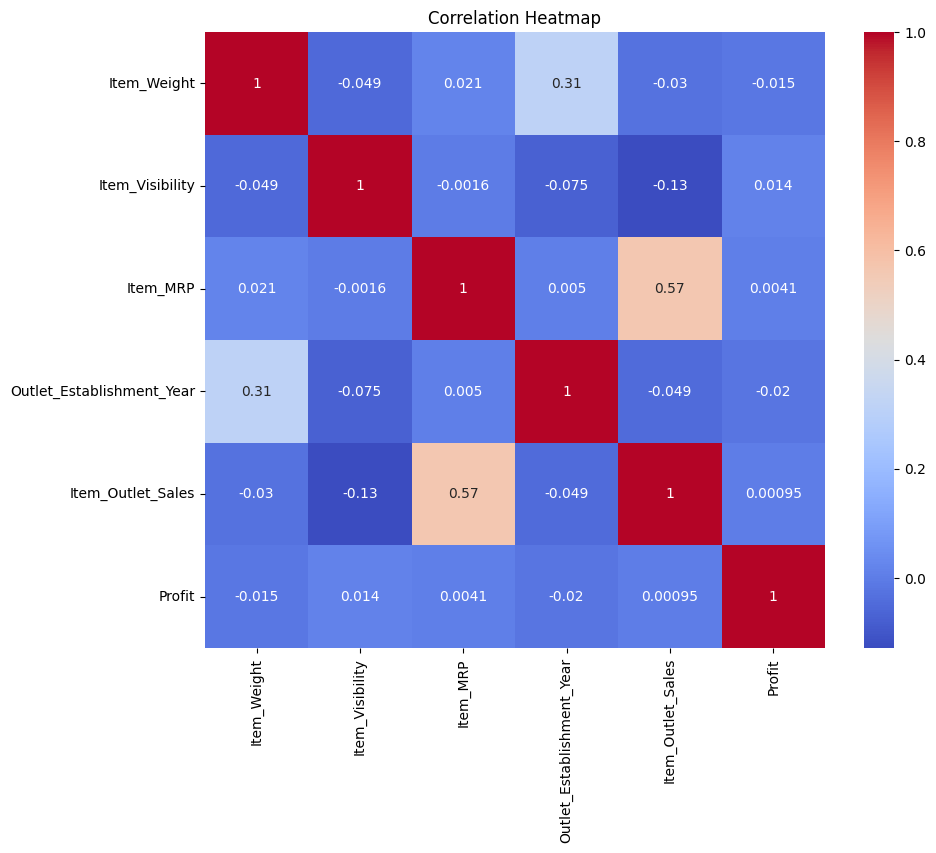

In [10]:
# Outlier visualization and correlation heatmap
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols].boxplot(figsize=(12,6), rot=45)
plt.title('Boxplot of Numeric Features')
plt.show()
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

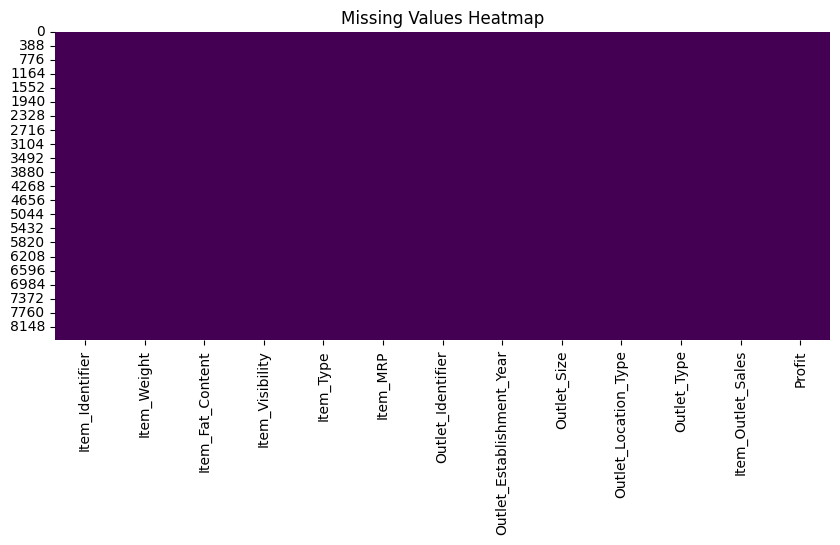

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Profit
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,11.688100,0.066132,140.998838,1997.831867,2181.288914,13.414514
std,5.599483,0.051598,62.258099,8.371760,1706.499616,1.701840
min,0.000000,0.000000,31.300000,1985.000000,33.290000,0.100000
25%,8.050000,0.026989,93.800000,1987.000000,834.247400,13.150000
50%,11.688100,0.053931,142.700000,1999.000000,1794.331000,13.900000
75%,16.000000,0.094585,185.650000,2004.000000,3101.296400,14.300000
max,100.000000,0.328391,266.900000,2009.000000,13086.964800,24.000000


In [11]:
# Visualize missing values and basic statistics
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()
df.describe()

### Check Data Columns and Types
It's important to check the column names and types to ensure compatibility with the rest of the notebook.

In [12]:
# Display columns and data types
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,Medium,Tier 2,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [13]:
# Example preprocessing
df = df.dropna()
# Convert date column if present
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Month'] = df['Date'].dt.month
# Encode categoricals
for col in df.select_dtypes(include='object').columns:
    if col != 'Date':
        df[col] = df[col].astype('category').cat.codes
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,156,9.30,1,0.016047,4,249.8,9,1999,1,0,1,3735.1380,11.5
1,8,5.92,2,0.019278,14,48.3,3,2009,1,0,2,443.4228,14.3
2,662,17.50,1,0.016760,10,141.6,9,1999,1,0,1,2097.2700,14.5
3,1121,19.20,2,0.000000,6,182.1,0,1998,1,0,0,732.3800,13.6
4,1297,8.93,1,0.000000,9,53.9,1,1987,0,1,1,994.7052,14.1


## 3. Feature Selection & Train-Test Split
Update the target and features as per your dataset.

In [14]:
# Set the correct target column for prediction
target = 'sales'  # Use the actual column name from your data
features = [col for col in df.columns if col != target]  # Exclude target
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: 'sales'

In [15]:
import xgboost as xgb

# 1. Create the model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)

# 2. Train the model
xgb_model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [16]:
import joblib
joblib.dump(xgb_model, '../model/sales_predictor.joblib')
print('Model saved to ../model/sales_predictor.joblib')

Model saved to ../model/sales_predictor.joblib


In [17]:
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
joblib.dump(xgb_model, '../model/sales_predictor.joblib')

NameError: name 'X_train' is not defined

## 4. Model Training (Random Forest & XGBoost)

In [18]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

NameError: name 'X_train' is not defined

## 5. Evaluation
Compare models using RMSE, MAE, and R².

In [19]:
def print_metrics(y_true, y_pred, model_name):
    print(f'{model_name} Results:')
    print('RMSE:', np.sqrt(mean_squared_error(y_true, y_pred)))
    print('MAE:', mean_absolute_error(y_true, y_pred))
    print('R2:', r2_score(y_true, y_pred))
    print('-'*30)
print_metrics(y_test, rf_pred, 'Random Forest')
print_metrics(y_test, xgb_pred, 'XGBoost')

NameError: name 'y_test' is not defined

## 6. Save Best Model
Save the best performing model to the `model/` folder.

In [20]:
# Save XGBoost model as example
joblib.dump(xgb_model, '../model/sales_predictor.joblib')
print('Model saved to ../model/sales_predictor.joblib')

Model saved to ../model/sales_predictor.joblib


In [21]:
# Print all column names to help select the correct target column
print(df.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Profit'],
      dtype='object')
